<div style="background-color: #9b3832; padding: 20px; border-radius: 10px; box-shadow: 0px 0px 10px #888888;">
  <h1 style="color: white; font-size: 70px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">ANALYSIS OF A NETFLIX MOVIE
  
</h1>
</div>

# Installing and importing the required modules and packages.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects
import warnings # handle warning messages
warnings.filterwarnings('ignore') # Ignore warning messages

C:\Users\nagad\AppData\Local\Temp\ipykernel_12700\2272918490.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Loading the data --> Select the path of the  file that's downloaded

In [5]:
df = pd.read_csv("C:/Users/nagad/.vscode/codes/internships/Netflix analysis/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Checking the columns name


In [9]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Checking the data shape from the csv file

In [ ]:
import pandas as pd
df = pd.read_csv("C:/Users/nagad/.vscode/codes/internships/NETFLIX/netflix_titles.csv")
print("Shape of the DataFrame:",df.shape)

Shape of the DataFrame: (8807, 12)


# Information about the dataset


In [ ]:
import pandas as pd
df = pd.read_csv("C:/Users/nagad/.vscode/codes/internships/NETFLIX/netflix_titles.csv")
print("Information about the dataset:")
print(df.info())

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


# Checking for null values in the dataset

In [ ]:
import pandas as pd
df = pd.read_csv("C:/Users/nagad/.vscode/codes/internships/NETFLIX/netflix_titles.csv")
print("\nNumber of missing values in each column:")
print(df.isnull().sum())


Number of missing values in each column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


# Visualising the graph for notnull values

<Axes: >

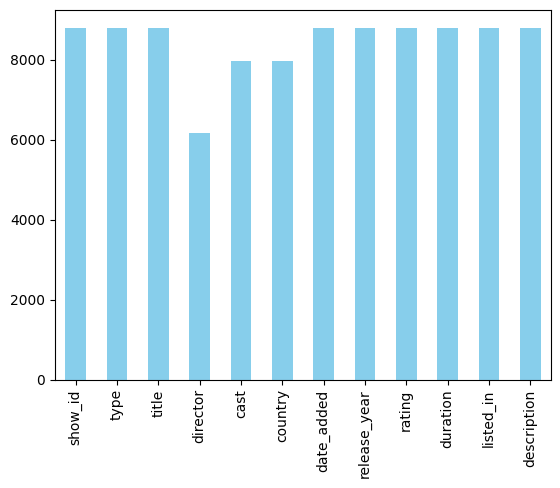

In [10]:
df.notnull().sum().plot(kind='bar',color='skyblue')

# Remove null values from the DataFrame --> After removing null values, check the data shape


In [ ]:
netflix_removed_null= df.dropna()

# Check the shape of the DataFrame after removing null values
print("Shape of the DataFrame after removing null values:", netflix_removed_null.shape)

Shape of the DataFrame after removing null values: (5332, 12)


# Checking the duplicate values in the data

In [ ]:
duplicate_values = df[df.duplicated()]
if duplicate_values.empty:
    print("No duplicate values found in the DataFrame.")
else:
    print("Duplicate values found in the DataFrame:")
    print(duplicate_values)

No duplicate values found in the DataFrame.


# Displaying the percentage of movies and tv shows

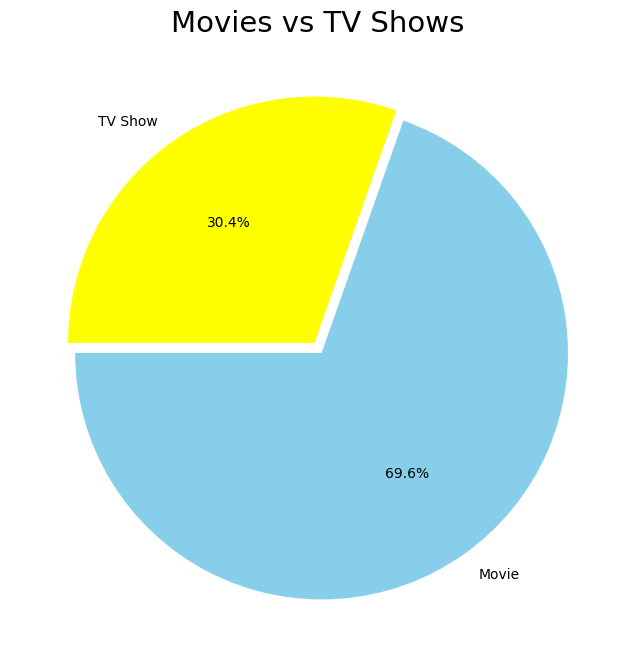

In [12]:
plt.figure(figsize=(12,8))
plt.title("Movies vs TV Shows", fontsize=21)
plt.pie(df.type.value_counts(),explode=(0.025,0.025), labels=df.type.value_counts().index, colors=['skyblue','yellow'],  autopct='%1.1f%%', startangle=180)
plt.show()

# Plotting a bargraph for number of movies per genre

Text(0.5, 0, 'Genres')

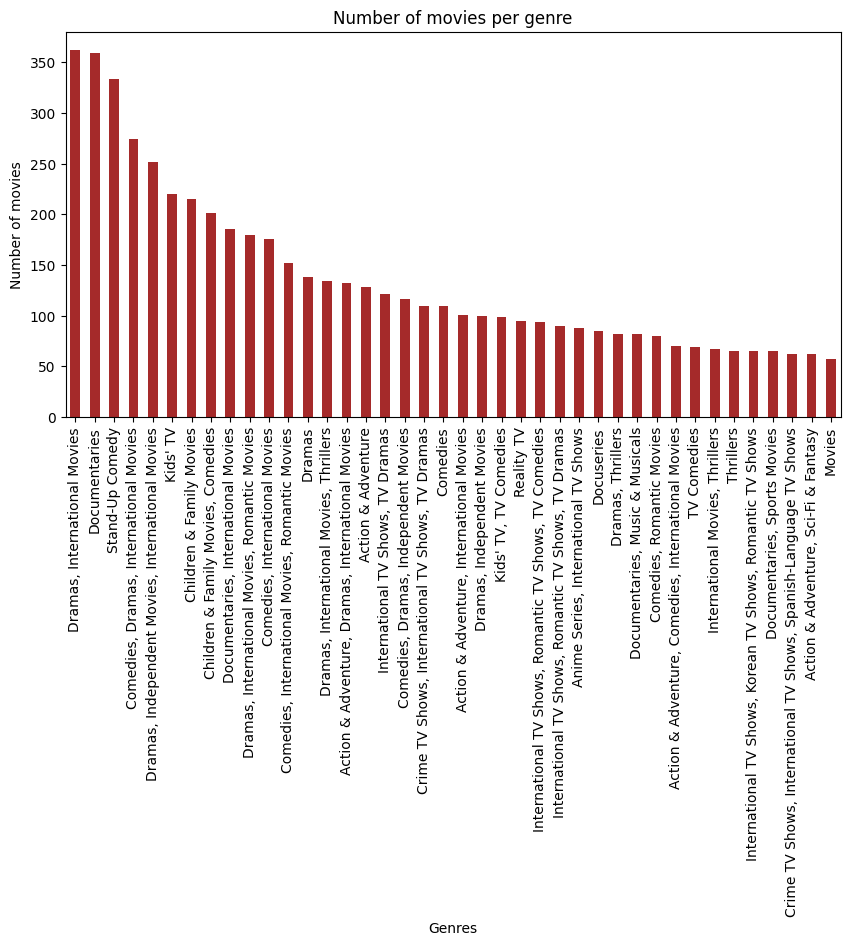

In [15]:
df.listed_in.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5),color='brown')
plt.title("Number of movies per genre")
plt.ylabel("Number of movies")
plt.xlabel("Genres")

# Select rows where 'type' is 'Movie'

In [ ]:
movie = netflix[netflix['type'] == 'Movie']
print(movie)

     show_id   type         title             director  \
7         s8  Movie       Sankofa         Haile Gerima   
9        s10  Movie  The Starling       Theodore Melfi   
12       s13  Movie  Je Suis Karl  Christian Schwochow   
24       s25  Movie         Jeans           S. Shankar   
27       s28  Movie     Grown Ups         Dennis Dugan   
...      ...    ...           ...                  ...   
8801   s8802  Movie       Zinzana      Majid Al Ansari   
8802   s8803  Movie        Zodiac        David Fincher   
8804   s8805  Movie    Zombieland      Ruben Fleischer   
8805   s8806  Movie          Zoom         Peter Hewitt   
8806   s8807  Movie        Zubaan          Mozez Singh   

                                                   cast  \
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
27    Ad

# Remove 'min' suffix from values in the 'duration' column and convert to integers

In [ ]:
movie['duration'] = movie['duration'].str.replace(' min', '').astype(int)

print(movie)

     show_id   type         title             director  \
7         s8  Movie       Sankofa         Haile Gerima   
9        s10  Movie  The Starling       Theodore Melfi   
12       s13  Movie  Je Suis Karl  Christian Schwochow   
24       s25  Movie         Jeans           S. Shankar   
27       s28  Movie     Grown Ups         Dennis Dugan   
...      ...    ...           ...                  ...   
8801   s8802  Movie       Zinzana      Majid Al Ansari   
8802   s8803  Movie        Zodiac        David Fincher   
8804   s8805  Movie    Zombieland      Ruben Fleischer   
8805   s8806  Movie          Zoom         Peter Hewitt   
8806   s8807  Movie        Zubaan          Mozez Singh   

                                                   cast  \
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
9     Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...   
12    Luna Wedler, Jannis Niewöhner, Milan Peschel, ...   
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
27    Ad

# Check data types of movie duration

In [ ]:
print("Data type of 'duration' column:",(movie['duration'].dtype))

Data type of 'duration' column: int32


# Create a scatter plot of 'release_year' versus 'duration'


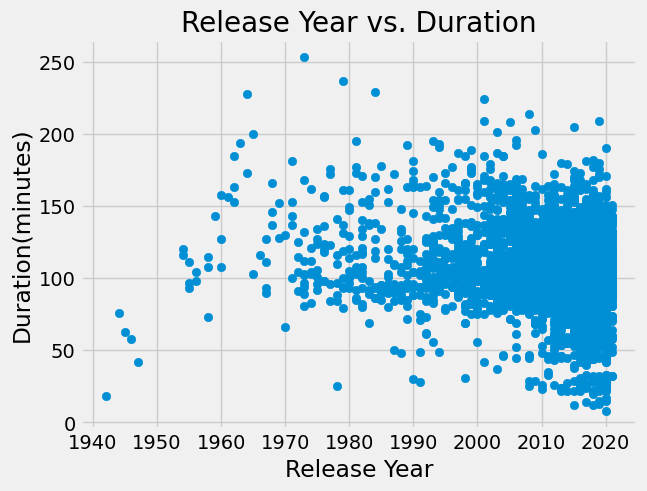

In [ ]:
plt.scatter(movie['release_year'], movie['duration'])

# Adding labels and title
plt.xlabel('Release Year')
plt.ylabel('Duration(minutes)')
plt.title('Release Year vs. Duration')

# Display the plot
plt.show()

# Find the index of the row with the minimum duration and get the corresponding release year and duration


In [ ]:
min_duration_index = movie['duration'].idxmin()

# Get the corresponding release year and duration
min_duration_release_year = netflix.loc[min_duration_index, 'release_year']
min_duration = netflix.loc[min_duration_index, 'duration']

# Find the index of the row with the maximum duration
min_duration_index = netflix['duration'].idxmin()

# Get the corresponding release year and duration
print("Index of row with minimum duration:", min_duration_index)
print("Corresponding release year:", min_duration_release_year)
print("Minimum duration (minutes):", min_duration)

Index of row with minimum duration: 198
Corresponding release year: 2020
Minimum duration (minutes): 8 min


# Count the occurrences of each unique entry in the 'listed_in' column


In [ ]:
listed_in_counts = netflix['listed_in'].value_counts()

# Display the genre counts
print("Occurrences of each unique entry in the 'listed_in' column:")
print(listed_in_counts)

Occurrences of each unique entry in the 'listed_in' column:
listed_in
Dramas, International Movies                               336
Stand-Up Comedy                                            286
Comedies, Dramas, International Movies                     257
Dramas, Independent Movies, International Movies           243
Children & Family Movies, Comedies                         179
                                                          ... 
Comedies, Documentaries                                      1
International TV Shows, Romantic TV Shows, TV Mysteries      1
Horror Movies, International Movies, Sci-Fi & Fantasy        1
Reality TV                                                   1
Cult Movies, Dramas, Thrillers                               1
Name: count, Length: 335, dtype: int64


# Displaying the content released by Netflix throught the years

In [36]:
import plotly.express as px 
df1=df[['type','release_year']]
df2=df1.groupby(['release_year','type']).size().reset_index(name='Total Content')
df2=df2[df2['release_year']>=2000]
fig = px.line(df2, x="release_year", y="Total Content", color='type', title='Trending content released by Netflix over the years')
fig.show()

# Extract genres from the 'listed_in' column --> Count the occurrences of each genre

In [ ]:
# Extract genres from the 'listed_in' column
genres = netflix['listed_in'].str.split(', ')
all_genres = [genre for sublist in genres.dropna() for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

print("Occurrences of each genre:")
print(genre_counts)

Occurrences of each genre:
International Movies            2369
Dramas                          2293
Comedies                        1553
Action & Adventure               806
Independent Movies               740
Romantic Movies                  579
Thrillers                        547
Children & Family Movies         503
Documentaries                    391
Horror Movies                    336
Stand-Up Comedy                  294
Music & Musicals                 292
Sci-Fi & Fantasy                 236
Sports Movies                    156
Classic Movies                   108
International TV Shows            87
LGBTQ Movies                      80
Cult Movies                       69
Anime Features                    61
Faith & Spirituality              58
TV Dramas                         52
Crime TV Shows                    38
TV Comedies                       30
British TV Shows                  21
Romantic TV Shows                 21
Movies                            20
Docuseries 

# Graphical representation of each genre occurence

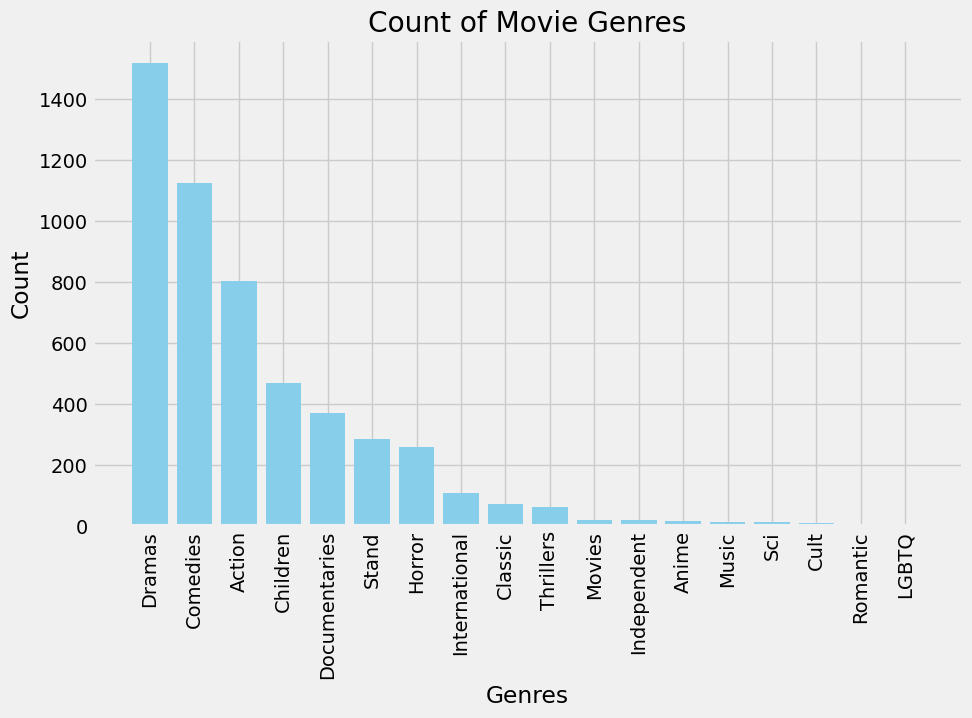

In [ ]:
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

genre_counts_movie = movie['genres'].value_counts().reset_index()

# Rename the columns to 'genre' and 'count'
genre_counts_movie.columns = ['genre', 'count']

# Create a bar plot of genre counts
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_movie['genre'], genre_counts_movie['count'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movie Genres')
plt.xticks(rotation=90)
plt.show()

# Ratings comparison of United States and India

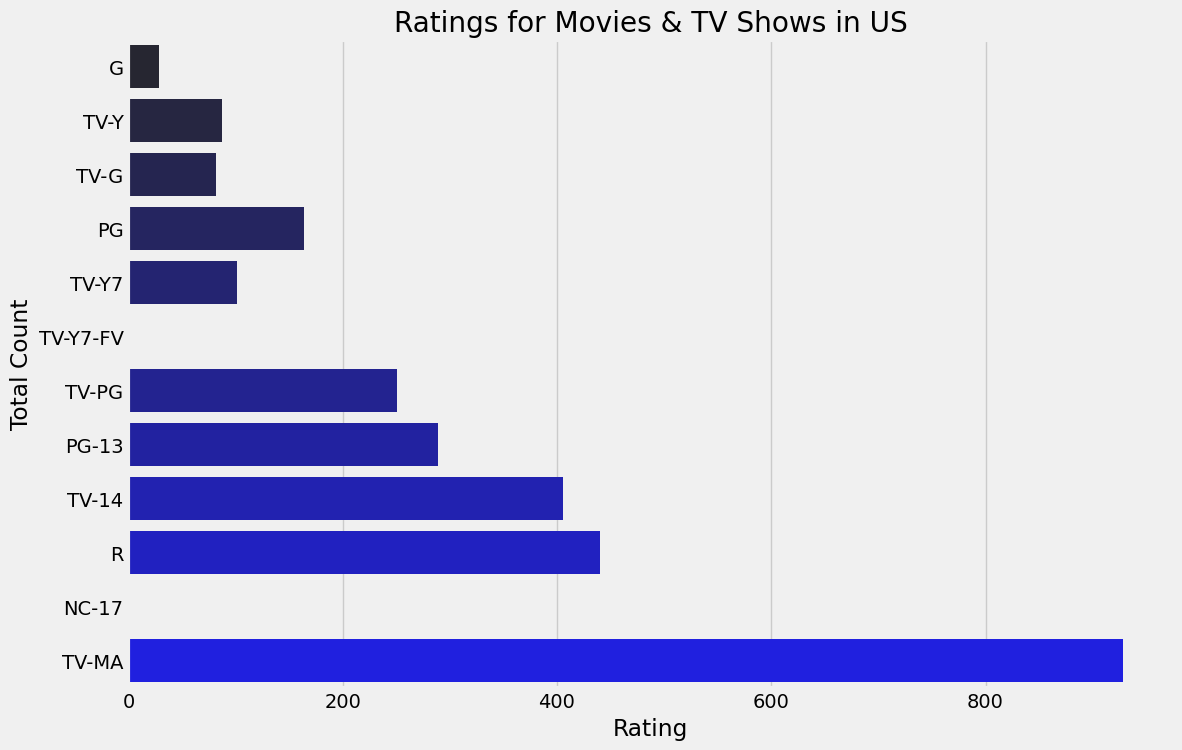

In [29]:
US = df[df.country == "United States"]
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(12,8))
g = sns.countplot(US.rating,order=order, palette="dark:blue");
plt.title("Ratings for Movies & TV Shows in US")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

# Change the x data to movie['duration']


In [ ]:
import plotly.graph_objects as go
# Change the x data to movie['duration']
trace = go.Histogram(x=movie['duration'],  
    xbins=dict(size=0.5),
    marker=dict(color='rgb(26, 118, 255)'))


layout = go.Layout(template="plotly_dark",  # Dark theme layout
    title='Distribution of Movie Durations',  # Title of the plot
    xaxis=dict(title='Duration (Minutes)'))  # X-axis labe)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

# Visualizing the ratings for movies and shows

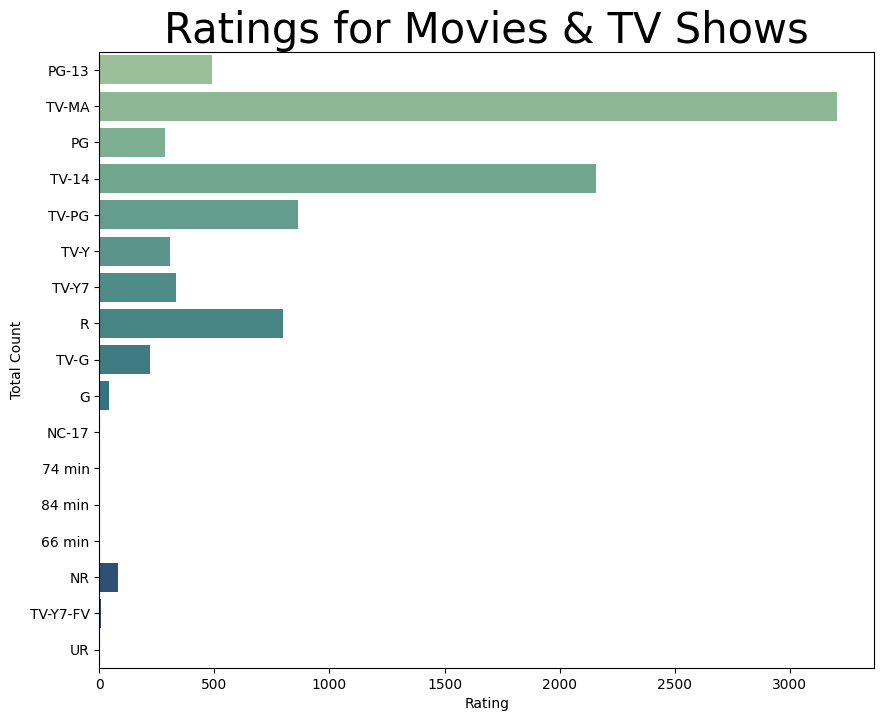

In [20]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import plotly.graph_objects as go # Plotly graph objects
plt.figure(figsize=(10,8))
graph = sns.countplot(df.rating, palette="crest");
plt.title("Ratings for Movies & TV Shows", fontsize=30)
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

# Plotting a bargraph for the duration of each movie

Text(0.5, 0, 'Duration')

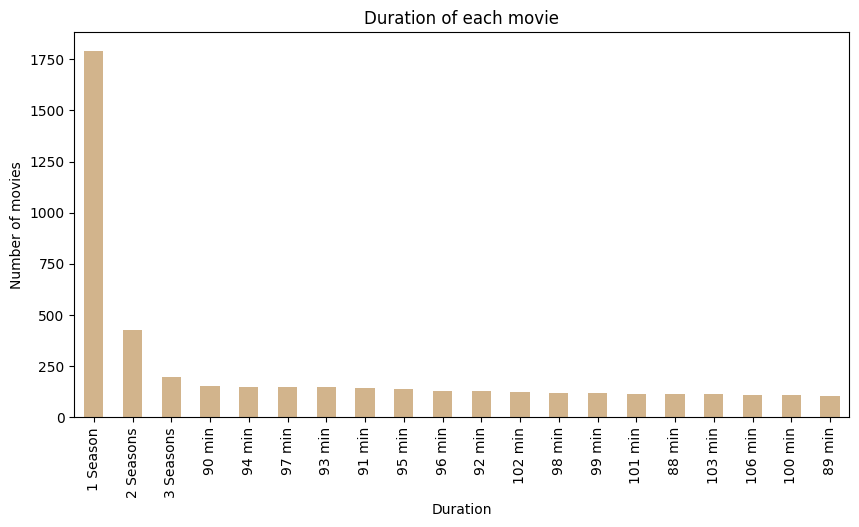

In [16]:
df.duration.value_counts().nlargest(20).plot(kind='bar',figsize=(10,5),color='tan')
plt.title("Duration of each movie")
plt.ylabel("Number of movies")
plt.xlabel("Duration")